## Homework 1.3.1 - Pythagorean Problem

Consider three bodies of mass, $m1 = 3$, $m_2 = 4$, and $m_3 = 5$, located coordinate $(x, y)$ at $(1, 3)$, $(-2, -1)$ and $(1, -1)$ respectively. All are initially at rest. The interaction between particles are given by Newton's second law of motion and Newton's gravitational law:

$${{\vec F}_i} = {m_i}{a_i} =  - G\sum\limits_{i \ne j} {{m_i}{m_j}\frac{{{{\vec r}_i} - {{\vec r}_j}}}{{{{\left| {{{\vec r}_i} - {{\vec r}_j}} \right|}^3}}}} $$

Using $G = 4 \pi$, investigate the motion of the particles from $t = 0$ to $t = 10$

$$ a_i = - G\sum\limits_{i \ne j} {{m_j}\frac{{{{\vec r}_i} - {{\vec r}_j}}}{{{{\left| {{{\vec r}_i} - {{\vec r}_j}} \right|}^3}}}}$$

In [51]:
from scipy.integrate import odeint
from scipy.special import gamma, airy
import numpy as np
import matplotlib.pyplot as plt
import math

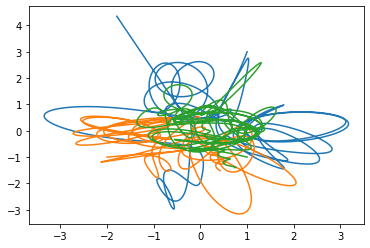

In [63]:
# write codes
G = 4*np.pi**2

# calculate initial conditions, y0
x_1 = 1
x_2 = -2
x_3 = 1
y_1 = 3
y_2 = -1
y_3 = -1

xy_init = [0,0,0,0,0,0,x_1, y_1, x_2, y_2, x_3, y_3]
# [v1x v2x v3x v1y v2y v3y x1 x2 x3 y1 y2 y3]
# [v1x, v1y, v2x, v2y, v3x, v3y, x1, y1, x2, y2, x3, y3]

def norm_vect_v(n):
    return np.sqrt(n[0]**2 + n[1]**2)

def rhs(y, t):
    m = [3, 4, 5]
    v = y[:len(y)//2]
    x_y = y[len(y)//2:]
#     print(v, x_y)
    x_y = np.array(x_y).reshape((3, 2))
#     print(x_y)
    aa = []
    for i in range(3):
        summ = 0
        for j in range(3):
            if i != j:
                n = (x_y[i] - x_y[j])
#                 print(x_y[i] , x_y[j] , n)
                summ += -G*(m[j]*(n)/((norm_vect_v(n))**3))
#                 print(-G*summ)
                
        aa.append(summ[0])
        aa.append(summ[1])
        
#     print(np.append(-G*np.array(aa), v))
#     return
    return np.append(np.array(aa), v)

t = np.arange(0, 10., 0.002)
y = odeint(rhs, xy_init, t)

# [v1x, v1y, v2x, v2y, v3x, v3y, x1, y1, x2, y2, x3, y3]

for i in range(3):
#   plot x - y
#     print(2*i+6, 2*i+7)
    plt.plot(y[:,2*i+6], y[:,2*i+7])
plt.show()

___
## Homework 1.3.2 - Double Pendulum
![alt text](images/double-pendulum.png "Double Pendulum")

The equations of motion for the double pendulum are given by [from http://scienceworld.wolfram.com/physics/DoublePendulum.html]:

$$({m_1} + {m_2}){l_1}{{\ddot \theta }_1} + {m_2}{l_2}{{\ddot \theta }_2}\cos ({\theta _1} - {\theta _2}) + {m_2}{l_2}{({{\dot \theta }_2})^2}\sin ({\theta _1} - {\theta _2}) + ({m_1} + {m_2})g\sin {\theta _1} = 0$$

$${m_2}{l_2}{{\ddot \theta }_2} + {m_2}{l_1}{{\ddot \theta }_1}\cos ({\theta _1} - {\theta _2}) - {m_2}{l_1}{({{\dot \theta }_1})^2}\sin ({\theta _1} - {\theta _2}) + {m_2}g\sin {\theta _2} = 0$$

Given that $l_1 = 1$, $l_2 = 2$, $m_1 = 2$, $m_2 = 1$ and $g = 9.8$ $m/s^2$

The initial conditions at $t = 0$ are:

${{\theta }_1}(0) = 1.5$

${{\dot \theta }_1}(0) = 0$

${{\theta }_2}(0) = 3.0$

${{\dot \theta }_2}(0) = 0.0$

Write a program to plots the positions of the mass $m_2$ in $x-y$ coordinate over the time interval $0 \le t \le T\; s$. Where $T$ are:

a) 10

b) 100

In [3]:
# write codes

# calculate initial conditions, y0

theta1_dot_0 = 0.
theta2_dot_0 = 0.
theta1_0 = 1.5
theta2_0 = 3

l_1 = 2
l_2 = 1
m_1 = 2
m_2 = 1
g = 9.8

theta_init = [theta1_dot_0, theta2_dot_0, theta1_0, theta2_0]
# [theta1_dot_0, theta2_dot_0, theta1_0, theta2_0]


# define vector f(theta,t)

def rhs(theta, t):

    A = np.zeros((2,2))

    A[0,0] = (m_1 + m_2)*l_1
    A[0,1] = m_2*l_2*math.cos(theta[2] - theta[3])
    A[1,0] = m_2*l_1*math.cos(theta[2] - theta[3])
    A[1,1] = m_2*l_2
    
    B = np.zeros(2)
    
    B[0] = -m_2*l_2*(theta[1]**2)*math.sin(theta[2] - theta[3]) - (m_1+m_2)*g*math.sin(theta[2])
    B[1] = m_2*l_1*(theta[0]**2)*math.sin(theta[2] - theta[3])-m_2*g*math.sin(theta[3])     

    theta_1_dd, theta_2_dd = np.linalg.solve(A, B)
    
    return [theta_1_dd,
            theta_2_dd,
            theta[0],
            theta[1]] # an array of [ first order , no order ]


t = np.arange(0, 10., 0.05)

thetas_10 = odeint(rhs, theta_init, t)

# print(t)
# print(thetas_10)

# plt.plot(thetas[:,2], thetas[:,3])

# but it does not make sense to plot x vs theta
# the question wants x, y

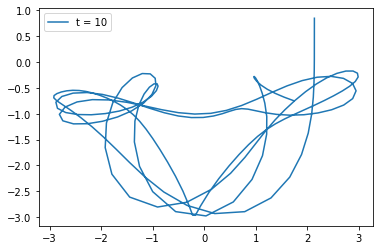

In [4]:
pos_y = (-l_1*np.cos(thetas_10[:, 2]) -l_2*np.cos(thetas_10[:,3]))
pos_x = (l_1*np.sin(thetas_10[:, 2]) + l_2*np.sin(thetas_10[:,3]))

plt.plot(pos_x, pos_y, label='t = 10')
plt.legend()

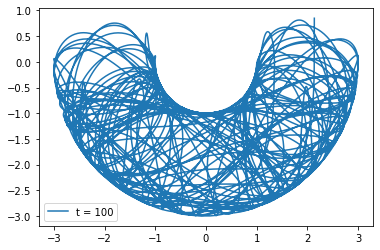

In [5]:
t = np.arange(0, 100, 0.01)
thetas_100 = odeint(rhs, theta_init, t) 

pos_y = (-l_1*np.cos(thetas_100[:, 2]) - l_2*np.cos(thetas_100[:,3]))
pos_x = (l_1*np.sin(thetas_100[:, 2]) + l_2*np.sin(thetas_100[:,3]))

plt.plot(pos_x, pos_y, label='t = 100')
plt.legend()

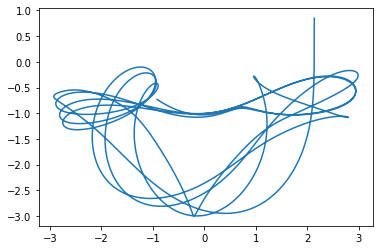

In [6]:
t = np.arange(0, 14., 0.005)
thetas = odeint(rhs, theta_init, t)

pos_y = (-l_1*np.cos(thetas[:, 2]) - l_2*np.cos(thetas[:,3]))
pos_x = (l_1*np.sin(thetas[:, 2]) + l_2*np.sin(thetas[:,3]))

plt.plot(pos_x, pos_y)


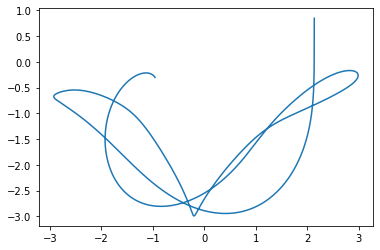

In [7]:
t = np.arange(0, 5., 0.005)
thetas = odeint(rhs, theta_init, t)

pos_y = (-l_1*np.cos(thetas[:, 2]) - l_2*np.cos(thetas[:,3]))
pos_x = (l_1*np.sin(thetas[:, 2]) + l_2*np.sin(thetas[:,3]))

plt.plot(pos_x, pos_y)
